In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv('SHL_categ.csv')

df.columns = df.columns.str.replace(' ', '_')
df.head()

,Person_ID,Gender,Age,Occupation,Sleep_Duration,Quality_of_Sleep,Physical_Activity_Level,Stress_Level,BMI_Category,Heart_Rate,Daily_Steps,Sleep_Disorder
0,1,Male,20−29,Software Engineer,Low,Normal,Moderate,Normal,Overweight,Normal,Low,NaN
1,2,Male,20−29,Doctor,Low,Normal,Moderate,High,Normal,Normal,High,NaN
2,3,Male,20−29,Doctor,Low,Normal,Moderate,High,Normal,Normal,High,NaN
3,4,Male,20−29,Sales Representative,Low,Bad,Low,High,Obese,High,Low,Sleep Apnea
4,5,Male,20−29,Sales Representative,Low,Bad,Low,High,Obese,High,Low,Sleep Apnea


In [13]:
df.isna().sum()

Person_ID                    0
Gender                       0
Age                          0
Occupation                   0
Sleep_Duration               0
Quality_of_Sleep             0
Physical_Activity_Level      0
Stress_Level                 0
BMI_Category                 0
Heart_Rate                   0
Daily_Steps                  0
Sleep_Disorder             219
dtype: int64

In [14]:
df.Sleep_Disorder.fillna('No', inplace=True)
df.Sleep_Disorder.value_counts()

Sleep_Disorder
No             219
Sleep Apnea     78
Insomnia        77
Name: count, dtype: int64

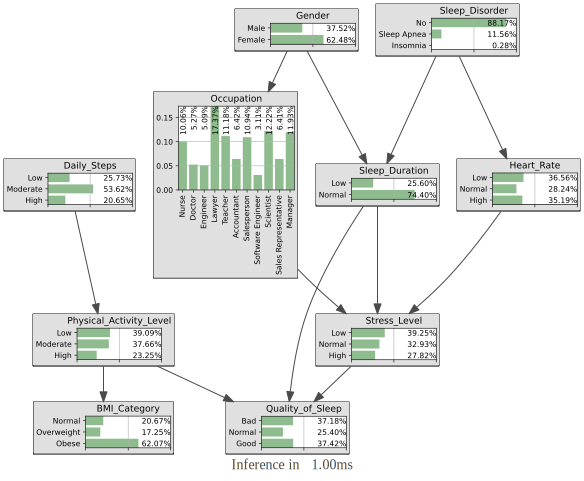

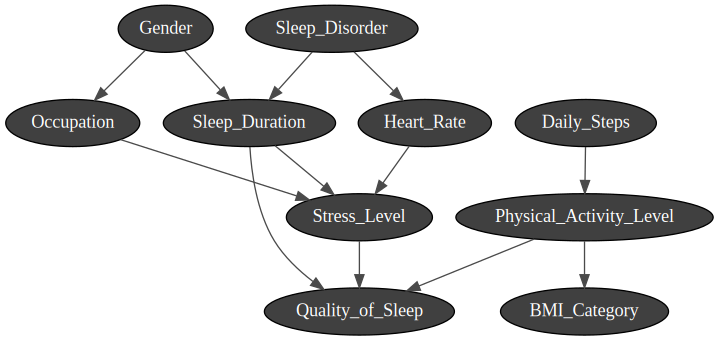

(None, None)

In [22]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

# Create a Bayesian Network
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb


bn = gum.fastBN('Daily_Steps{Low|Moderate|High} -> Physical_Activity_Level{Low|Moderate|High}; '
                'Gender{Male|Female} -> Occupation{Nurse|Doctor|Engineer|Lawyer|Teacher|Accountant|Salesperson|Software Engineer|Scientist|Sales Representative|Manager}; '
                'Stress_Level{Low|Normal|High} -> Quality_of_Sleep{Bad|Normal|Good}; '
                'Physical_Activity_Level -> BMI_Category{Normal|Overweight|Obese}; '
                'Sleep_Duration{Low|Normal} -> Quality_of_Sleep; '
                'Sleep_Duration -> Stress_Level; '
                'Sleep_Disorder{No|Sleep Apnea|Insomnia} -> Heart_Rate{Low|Normal|High}; '
                'Occupation -> Stress_Level; '
                'Sleep_Disorder -> Sleep_Duration; '
                'Gender -> Sleep_Duration; '
                'Physical_Activity_Level -> Quality_of_Sleep; '
                'Heart_Rate -> Stress_Level')

# Display the Bayesian Network
gnb.showInference(bn,size="10"),gnb.showBN(bn, size="10!")


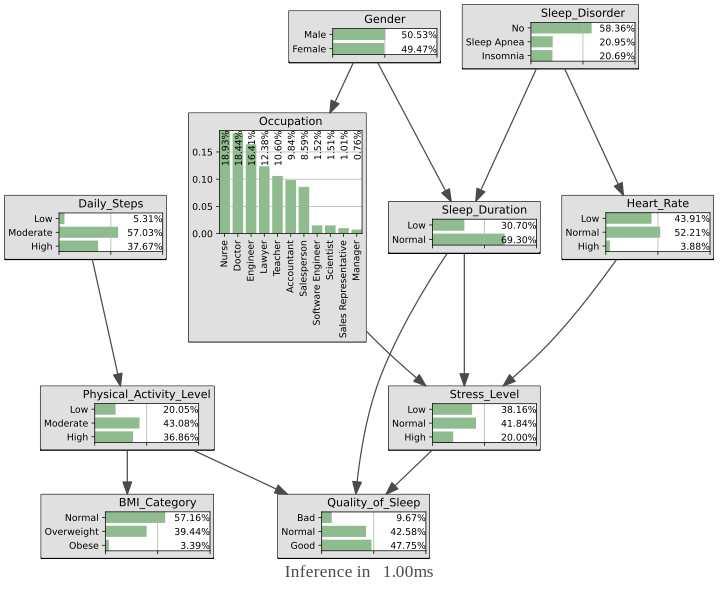

In [21]:
import pyAgrum.skbn as skbn

learner=gum.BNLearner(df, bn)
learner.useMIIC()
learner.useScoreBIC() 
learner.useSmoothingPrior(1)
bn33=learner.learnParameters(bn.dag())
gnb.showInference(bn33,size="10!")

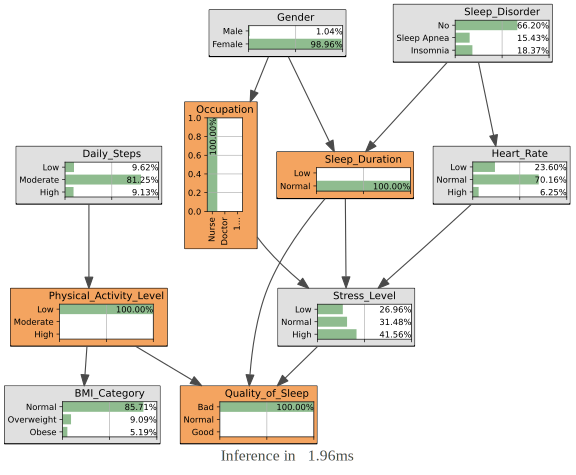

In [38]:

evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Nurse', 'Sleep_Duration': 'Normal', 'Quality_of_Sleep': 'Bad'}
gnb.showInference(bn33,size="8!", evs=evs)

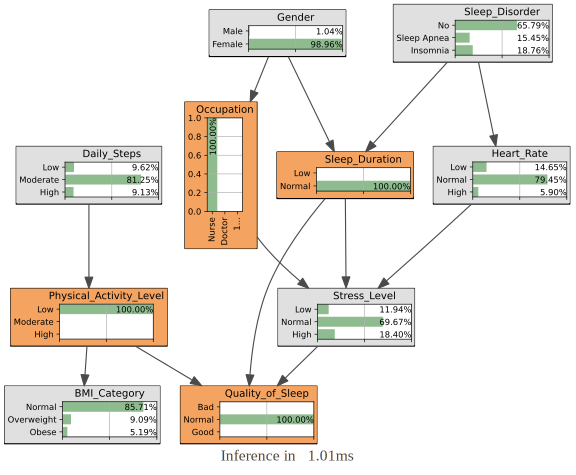

In [37]:
evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Nurse', 'Sleep_Duration': 'Normal', 'Quality_of_Sleep': 'Normal'}
gnb.showInference(bn33,size="8!", evs=evs)

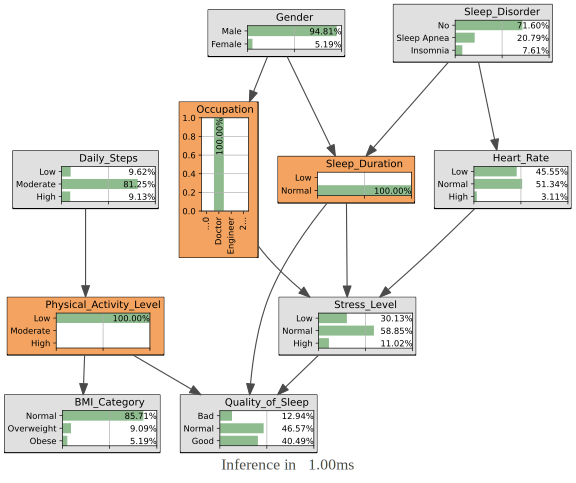

In [34]:
evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Doctor', 'Sleep_Duration': 'Normal'}
gnb.showInference(bn33,size="8!", evs=evs)

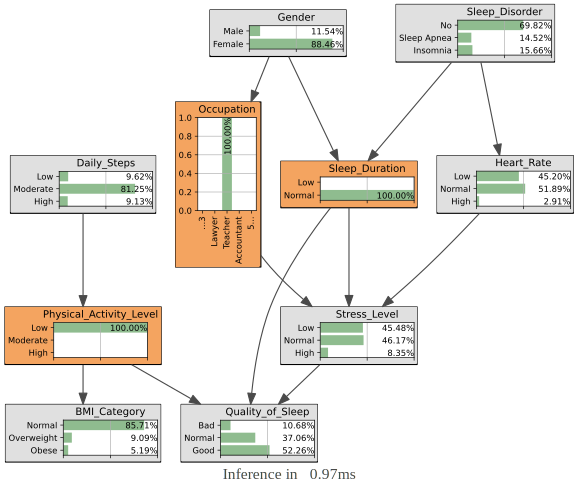

In [33]:
evs = {'Physical_Activity_Level': 'Low', 'Occupation': 'Teacher', 'Sleep_Duration': 'Normal'}
gnb.showInference(bn33,size="8!", evs=evs)